In [303]:
#import the libraries needed

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [304]:
#I saved the state temp csv locally and here I saved into a dataframe
df=pd.read_csv('state_temps.csv')

In [305]:
#changed the name of the date column to date 
df.rename(columns={'dt':'date'},inplace=True)
df.head()

,date,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645675 entries, 0 to 645674
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   date                           645675 non-null  object 
 1   AverageTemperature             620027 non-null  float64
 2   AverageTemperatureUncertainty  620027 non-null  float64
 3   State                          645675 non-null  object 
 4   Country                        645675 non-null  object 
dtypes: float64(2), object(3)
memory usage: 24.6+ MB


In [307]:
df.date = pd.to_datetime(df.date)
df.dtypes

date                             datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
State                                    object
Country                                  object
dtype: object

In [308]:
#looking at the shape of my data as well as count of nulls in each column. there are a lot and there are exact same for the two columns. 

df.shape, df.isnull().sum()

((645675, 5),
 date                                 0
 AverageTemperature               25648
 AverageTemperatureUncertainty    25648
 State                                0
 Country                              0
 dtype: int64)

In [309]:
#set my date column as my index and put it in order
df= df.set_index('date').sort_index()
df

,AverageTemperature,AverageTemperatureUncertainty,State,Country
date,,,,
1743-11-01,1.909,2.033,Nova Scotia,Canada
1743-11-01,0.753,2.817,Michigan,United States
1743-11-01,0.665,2.208,Prince Edward Island,Canada
1743-11-01,-0.526,2.304,Pskov,Russia
1743-11-01,1.891,1.718,Massachusetts,United States
...,...,...,...,...
2013-09-01,26.408,1.112,Texas,United States
2013-09-01,NaN,NaN,Victoria,Australia
2013-09-01,NaN,NaN,Tuva,Russia


In [310]:
#made my column headers all lower case for ease of calling later
df.columns=df.columns.str.lower()

In [312]:
#used boolean mask to create a new dataframe that only contains virginia
df1=df[(df.country == "United States") & (df.state == 'Virginia')]

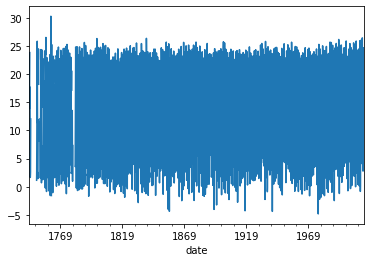

In [314]:
#initial plot to see data distribution over time
df1.averagetemperature.plot()
plt.show()

In [315]:
#use a boolean mask to see how many null values i have left and where they are
df1[df1.averagetemperature.isnull()]


,averagetemperature,averagetemperatureuncertainty,state,country
date,,,,
1743-12-01,NaN,NaN,Virginia,United States
1744-01-01,NaN,NaN,Virginia,United States
1744-02-01,NaN,NaN,Virginia,United States
1744-03-01,NaN,NaN,Virginia,United States
1744-08-01,NaN,NaN,Virginia,United States
...,...,...,...,...
1780-08-01,NaN,NaN,Virginia,United States
1780-09-01,NaN,NaN,Virginia,United States
1780-10-01,NaN,NaN,Virginia,United States


In [317]:
# i still have nulls to deal with 
df1.isnull().sum()

averagetemperature               120
averagetemperatureuncertainty    120
state                              0
country                            0
dtype: int64

In [318]:
# I created a new dataframe where years 1781 and prior are removed. this took care of my null values
df1=df1[df1.index.year >= 1782]

In [319]:
#looking at the data to confirm 
df1.info(),
df1.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2781 entries, 1782-01-01 to 2013-09-01
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   averagetemperature             2781 non-null   float64
 1   averagetemperatureuncertainty  2781 non-null   float64
 2   state                          2781 non-null   object 
 3   country                        2781 non-null   object 
dtypes: float64(2), object(2)
memory usage: 108.6+ KB


averagetemperature               0
averagetemperatureuncertainty    0
state                            0
country                          0
dtype: int64

In [320]:
#dropped columns with unneccessary info

df1=df1.drop(columns=['country','averagetemperatureuncertainty'])
df1

,averagetemperature,state
date,,
1782-01-01,-0.233,Virginia
1782-02-01,1.148,Virginia
1782-03-01,5.201,Virginia
1782-04-01,13.683,Virginia
1782-05-01,18.240,Virginia
...,...,...
2013-05-01,17.469,Virginia
2013-06-01,22.789,Virginia
2013-07-01,24.730,Virginia


In [321]:
#renamed my avg temp column to shorten it 
df1.rename(columns={"averagetemperature":'avg_temp'},inplace=True)

In [322]:
print(df1)

            avg_temp     state
date                          
1782-01-01    -0.233  Virginia
1782-02-01     1.148  Virginia
1782-03-01     5.201  Virginia
1782-04-01    13.683  Virginia
1782-05-01    18.240  Virginia
...              ...       ...
2013-05-01    17.469  Virginia
2013-06-01    22.789  Virginia
2013-07-01    24.730  Virginia
2013-08-01    22.643  Virginia
2013-09-01    20.219  Virginia

[2781 rows x 2 columns]


In [323]:
#resample my new dataframe to address any possible duplicates or missing months
df1=df1.resample('M').mean()

<AxesSubplot:xlabel='date'>

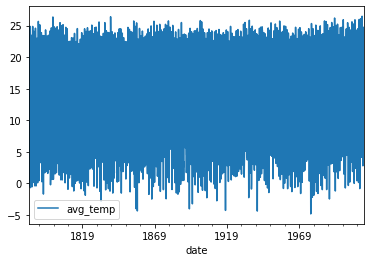

In [324]:
#looking at the distribution over time 
df1.plot()

<AxesSubplot:xlabel='date'>

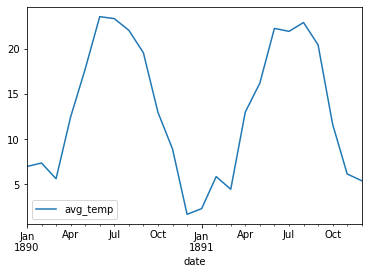

In [325]:
#focused in on a single year time frame to observe distribution 
df1.loc['1890':'1891'].plot()

<AxesSubplot:xlabel='date'>

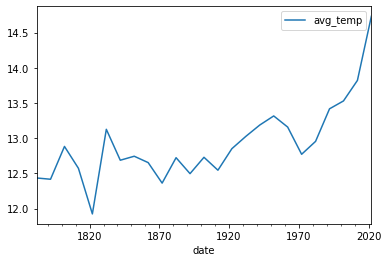

In [326]:
#resampled to every 10 years and plotted
df1.resample('10Y').mean().plot()

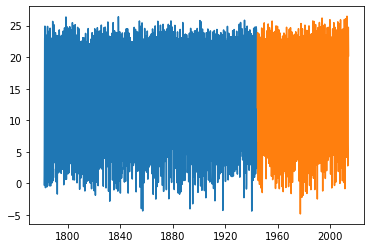

In [328]:
# I used a proportionality split 70/30 test train for my data and then plotted it

train_size = .70
n = df1.shape[0]
test_start_index = round(train_size * n)

train = df1[:test_start_index] # everything up (not including) to the test_start_index
test = df1[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.avg_temp)
plt.plot(test.index, test.avg_temp)


In [329]:
# here i decided to only use the data from year 1969 to the end. there was no utility in keeping the first 100 or so years
df2=df1.loc['1969':]

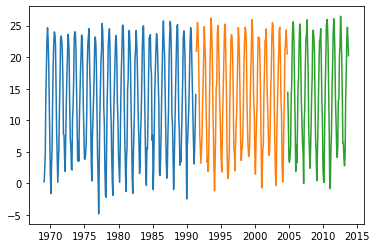

In [331]:
# re-split my data proportionally 50/30/10 percent on train, validate, test respectively

train_size = .50
validate_size= .30
n = df2.shape[0]

validate_start_index = round(train_size * n)
validate_end_index = round((validate_size * n)+ validate_start_index)

train = df2[:validate_start_index] # everything up (not including) to the validate_start_index
validate= df2[validate_start_index:validate_end_index] # everything including validate_start_index up (not including to) validate_end_index
test = df2[validate_end_index:] # everything from the test_start_index to the end

#plot to visualize my data split across time

plt.plot(train.index, train.avg_temp)
plt.plot(validate.index, validate.avg_temp)
plt.plot(test.index, test.avg_temp)

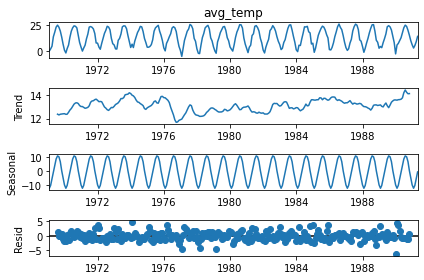

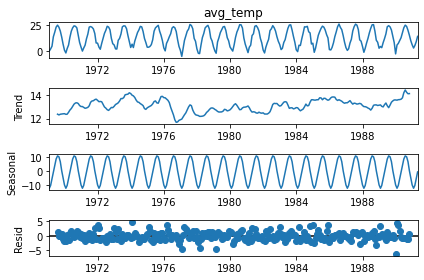

In [332]:
# taking a look at seasonal decompositon of avg_temp

sm.tsa.seasonal_decompose(train.avg_temp).plot()

In [333]:
from statsmodels.tsa.api import Holt

#create the model

model = Holt(train.avg_temp, exponential = False)

#fit the model

model = model.fit(smoothing_level = 0.1, 
                    smoothing_slope = 0, 
                    optimized = True)

#predict with the model
yhat_df = model.predict(start = validate.index[0], 
                            end = validate.index[-1])



/var/folders/cz/c_3mcxjd70n5lt7ww36zq9km0000gn/T/ipykernel_11148/3185586506.py:5: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = model.fit(smoothing_level = 0.1,


In [334]:
#saving predictions into a dataframe and naming the target value avg_temp
yhat_df=pd.DataFrame(yhat_df)
yhat_df=yhat_df.rename(columns={0:'avg_temp'})

In [335]:
from sklearn.metrics import mean_squared_error
from math import sqrt


# plot and evaluate 
def plot_and_eval(target_var):
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label = 'Train', linewidth = 1)
    plt.plot(validate[target_var], label = 'Validate', linewidth = 1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()


# evaluation function to compute rmse
def evaluate(target_var):
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 0)
    return rmse



avg_temp -- RMSE: 8


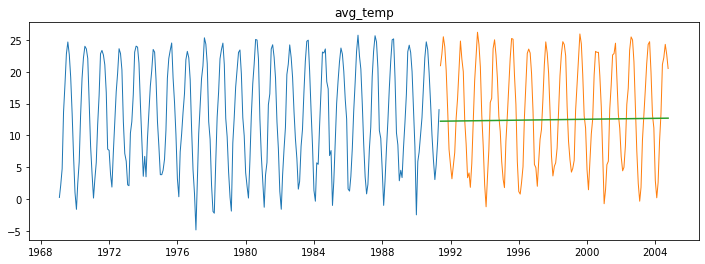

In [336]:
plot_and_eval('avg_temp')


In [337]:
# compute a 3 year rolling average, 
# use the most recent/last 3 year period value to predict forward. 

period = 3

rolling_avg_temp = round(train['avg_temp'].rolling(period).mean().iloc[-1], 2)


#saving the rolling avg into all the values 

yhat_df1 = pd.DataFrame({'avg_temp': [rolling_avg_temp],
                            
                           }, index = validate.index)
yhat_df1.head(2)


,avg_temp
date,
1991-05-31,9.49
1991-06-30,9.49


avg_temp -- RMSE: 8


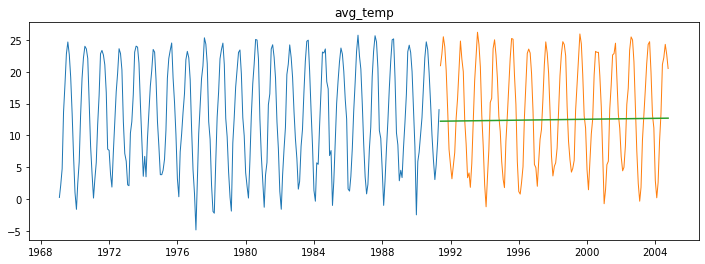

In [338]:
plot_and_eval('avg_temp')

In [339]:
# Create the empty dataframe
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])

# function to store rmse for comparison purposes
def append_eval_df(model_type, target_var):
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var], 'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)




eval_df = append_eval_df(model_type='30d moving average', 
                             target_var = 'avg_temp')

eval_df = append_eval_df(model_type = 'Holts', 
                             target_var = 'avg_temp')
eval_df                            



/var/folders/cz/c_3mcxjd70n5lt7ww36zq9km0000gn/T/ipykernel_11148/3404238276.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)
/var/folders/cz/c_3mcxjd70n5lt7ww36zq9km0000gn/T/ipykernel_11148/3404238276.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


,model_type,target_var,rmse
0,30d moving average,avg_temp,8.0
1,Holts,avg_temp,8.0


In [342]:
yhat_df=pd.DataFrame({'avg_temp':[rolling_avg_temp]},index=test.index)

rmse - avg_temp: 9.245979290821298


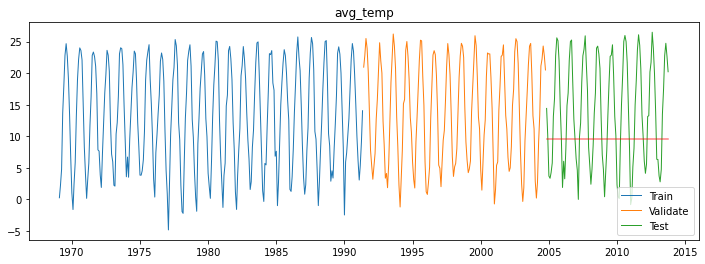

In [343]:
# Plot and evaluate train, validate, and test
def plot_and_eval_test(target_var):
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label = 'Train', linewidth = 1)
    plt.plot(validate[target_var], label = 'Validate', linewidth = 1)
    plt.plot(test[target_var], label = 'Test', linewidth = 1)
    plt.plot(yhat_df[target_var], alpha = .5, color="red")
    plt.title(target_var)
    plt.legend()
    plt.show()

rmse_avg_temp=sqrt(mean_squared_error(test.avg_temp, yhat_df.avg_temp))

print('rmse - avg_temp:' , rmse_avg_temp)


plot_and_eval_test('avg_temp')

# conclusion 

my RMSE for both of my rolling average and Holt's linear trend were both 8. for ease and simplicity i moved forward to my out of sample data with the rolling average.  When applied my RMSE for out of sample data rose to 9.25.  This coincides with the visual that the last part of the data trends upward. With implementing a static number on something that has a trend it will definately get worse with time.